[中文版](http://nbviewer.jupyter.org/github/w407022008/All-of-Notes/blob/master/System_Science_and_Control_Engineering/线性二次型最优控制问题%20LQ.ipynb)

# Linear quadratic optimal control

> Linear quadratic optimal control theory is the most mature, systematic and widely used branch of optimal control theory.

State equations and output equations for linear time-variant systems：$$\begin{cases} \dot X(t)=A(t)X(t)+B(t)U(t) & ,X(t_0)=X_0\\ Y(t)=C(t)X(t)\end{cases}$$
Set the expected output to $z(t)$，the output error vector：$e(t)=z(t)-y(t)$  
Introducing quadratic performance function：$J=\frac{1}{2}e^T(t_f)Fe(t_f)+\frac{1}{2}\int_{t_0}^{t_f}[X^T(t)Q(t)X(t)+U^T(t)R(t)U(t)]dt$  
Objective: Look for an optimal control input $U^*(t)$ to minimize the indicator function.  
Therefore, there are:
- if $C(t)=I,z(t)=0$，then $Y(t)=X(t)=-e(t)$，and there is：$$J=\frac{1}{2}X^T(t_f)FX(t_f)+\frac{1}{2}\int_{t_0}^{t_f}[X^T(t)Q(t)X(t)+U^T(t)R(t)U(t)]dt$$
This is called the ** state adjustment problem**
- if $z(t)=0$，then $Y(t)=-e(t)$，and there is$$J=\frac{1}{2}Y^T(t_f)FY(t_f)+\frac{1}{2}\int_{t_0}^{t_f}[Y^T(t)Q(t)Y(t)+U^T(t)R(t)U(t)]dt$$
This is called **output adjustment problem**
- if $z(t)\neq 0$，then $e(t)=z(t)-Y(t)$，and there is$$J=\frac{1}{2}e^T(t_f)Fe(t_f)+\frac{1}{2}\int_{t_0}^{t_f}[X^T(t)Q(t)X(t)+U^T(t)R(t)U(t)]dt$$ This is called **output tracking problem**

## - Finite time linear quadratic state regulator problem

Linear time-invariant system equation of state：$\dot X(t)=A(t)X(t)+B(t)U(t)$，initial conditions：$X(t_0)=X_0,t\in[t_0,t_f]$  
Quadratic performance index function：$$J=\frac{1}{2}X^T(t_f)FX(t_f)+\frac{1}{2}\int_{t_0}^{t_f}[X^T(t)Q(t)X(t)+U^T(t)R(t)U(t)]dt$$
Necessary and Sufficient Conditions for Optimal Control Input $U^*(t)$：$$U^*(t)=-R^{-1}(t)B^T(t)P(t)X^*(t)=-K(t)X^*(t)$$
The optimal trajectory is：$$\dot X^*(t)=A(t)X^*(t)+B(t)U^*(t)=[A(t)-B(t)K(t)]X^*(t)$$
The state transition equation is：$$X^*(t)=X_0e^{\int_0^t(A(x)+B(x)K(x))dx}$$
The optimal performance function is：$$J^*=\frac{1}{2}X_0^TP(t_0)X_0$$
where, P(t) satisfies：$$\begin{cases}-\dot P(t)+P(t)A(t)+A^T(t)P(t)-P(t)B(t)K(t)=-Q(t)\\ P(t_f)=F\end{cases}$$

## - Infinite time linear quadratic state regulator problem

Linear time-invariant system equation of state：$\dot X(t)=AX(t)+BU(t)$，initial conditions：$X(t_0)=X_0,t\in[t_0,\inf]$  
Quadratic performance function：$$J=\frac{1}{2}\int_{t_0}^{\inf}[X^T(t)Q(t)X(t)+U^T(t)R(t)U(t)]dt$$
Necessary and Sufficient Conditions for Optimal Control Input $U^*(t)$：$$U^*(t)=-R^{-1}B^TPX^*(t)=-KX^*(t)$$
The optimal trajectory is：$$\dot X^*(t)=AX^*(t)+BU^*(t)=[A-BK]X^*(t)$$
The state transition equation is：$$X^*(t)=X_0e^{(A+BK)t}$$
The optimal performance function is：$$J^*=\frac{1}{2}X_0^TPX_0$$
where, P(t) satisfies：$$PA+A^TP-PBK=-Q$$

**Matlab code**  
- continious-time algebraic Riccati equations:
    ``` matlab
    [P,L,K]=care(A,B,Q,R);
    ```
    R(defaut I);K=$R^{-1}B^TP$;L(pole points)

- linear-quadratic regulator
``` matlab
[K,P,L]=lqr(A,B,Q,R)
```


EigenValue =

     1
     1


EigenValueMod =

   -3.1421
   -1.4584




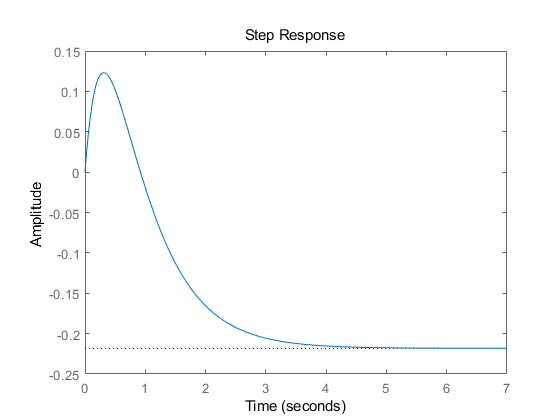

In [11]:
A=[1 0;1 1];B=[1;0];
EigenValue=eig(A)
Q=[10 0;0 10];
K=lqr(A,B,Q,1);
sys=ss(A-B*K,B,[1 0],[]);
EigenValueMod=eig(sys.a)
step(sys)

## - Optimal tracking problem

- Linear time-invariant system state space model：$\begin{cases}\dot X(t)=AX(t)+BU(t)&,X(t_0)=X_0,t\geq t_0\\Y=CX\end{cases}$  
Tracked reference variable $\widetilde{y}$ is the output of the linear time-invariant system：$\begin{cases} \dot Z=FZ & ,Z(t_0)=Z_0\\ \widetilde{y}=HZ\end{cases}$  
satisfy：$\sum(A,B)$ fully controllable，$\sum(A,C)$ fully observable，$\sum(F,H)$ fully observable。  
Quadratic performance function：$J(u)=\int_0^{\inf} [(Y-\widetilde{y})^TQ(Y-\widetilde y)+U^TRU]dt$  

- This combination system can be equivalent：$$\begin{cases}\dot{\bar{X}}(t)=\bar{A} \bar{X}(t)+\bar{B}\bar{U}(t)& \bar{X}(t_0)=\bar{X_0},t\geq t_0 \\ J(u)=\int_0^{\inf}(\bar{X}^T\bar{Q}\bar{X}+U^T\bar{R}U)dt\end{cases}$$
where $\bar{X}=\begin{bmatrix}X\\Z\end{bmatrix},\bar{A}=\begin{bmatrix}A&O\\O&F\end{bmatrix},\bar{B}=\begin{bmatrix}B\\O\end{bmatrix},\bar{Q}=\begin{bmatrix}C^TQC&-C^TQH\\-H^TQC&H^TQH\end{bmatrix},\bar{R}=R$  

- The only positive definite solution of Riccati algebraic equation $\bar{P}=\begin{bmatrix}P_{11}&P_{12}\\P^T_{12}&P_{22}\end{bmatrix}$ satisfy：$\bar{P}\bar{A}+\bar{A}^T\bar{P}+\bar{Q}-\bar{P}\bar{B}\bar{R}^{-1}\bar{B}^T\bar{P}=0$  
Therefore, there is an optimal tracking control system input $U^*$：$$U^*(t)=-K^*_1X-K^*_2Z$$ where $\begin{cases}K^*_1=R^{-1}B^TP\\K^*_2=R^{-1}B^TP_{12}\end{cases}$

## - Robustness of optimal regulation system
> The robustness indicators for measuring a system are: **phase angle margin**, **gain margin**,**non-linear feedback tolerance**  

! To be continued